## K Nearest Neighbors

**K-Nearest Neighbors (KNN)** merupakan algoritma Supervised Learning yang digunakan untuk melakukan klasifikasi. Ketika sebuah data point yang tidak diketahui kelasnya ingin diklasifikasikan ke dalam sebuah kelas, maka K-Nearest Neighbors akan melakukan identifikasi neighbors yang berada di sekitar data point yang akan ditentukan kelasnya. Secara singkat, ilustrasi dari KNN dapat ditunjukkan oleh gambar berikut di bawah ini:

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

Data Point yang ditunjukkan dengan simbol "bintang" di atas, merupakan data point yang akan ditentukan kelasnya, sedangkan titik berwarna kuning dan juga magenta di atas menjadi data point yang akan menjadi "neighbors". Neighbors dapat ditentukan dengan terlebih dahulu menentukan berapa jumlah k yang akan digunakan. Untuk contoh di atas, jumlah k=3 digunakan akan mengindentifikasi 3 buah data point terdekat yang akan digunakan dalam proses pengklasifikasian. Terlihat terdapat sebuah data point berwarna kuning dan dua buah data point lainnya berwarna magenta. Untuk jumlah k=6, jumlah neighbors yang berdekatan dengan data point ada 6 buah dengan komposisi masing-masing, 4 berwarna kuning dan 2 buah berwarna magenta. Perbedaan jumlah k menyebabkan data point diklasifikasikan ke dalam kelas berbeda, sehingga penentuan nilai k yang tepat akan mempengaruhi akurasi hasil dari pengklasifikasian.

Dalam tutorial kali ini, kita akan membahas terkait contoh sederhana penerapan KNN untuk mengklasifikasikan kategori customer sebuah perusahaan telekomunikasi.

### Memuat Library

Mari memulai dengan memuat library yang akan digunakan dalam tutorial kali ini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

### Tentang Dataset

Dataset ini merupakan dataset sebuah perusahaan telekomunikasi. Bayangkan jika dalam sebuah perusahaan telekomunikasi telah mengklasifikasikan masing-masing customernya ke dalam beberapa kategori sesuai dengan pola penggunaan layanannya. Jika data demografi dapat digunakan untuk melakukan prediksi grup keanggotaan, perusahaan dapat melakukan penawaran secara personal kepada customer yang prospektif. Ini dapat dipecahkan sebagai masalah klasifikasi. Oleh karena itu, diberikan dataset dengan label kelas yang sudah ditentukan sebelumnya. Kita akan membangun sebuah model yang akan digunakan untuk memprediksi kelas dari sebuah data atau case yang tidak diketahui.

Contoh berikut akan berfokus pada penggunaan data demografi seperti region, age, dan marital untuk memprediksi pola penggunaan layanan.

Untuk target field, yaitu custcat, memiliki empat buah kemungkinan nilai yang berkorespondensi ke empat grup customer, yaitu: 1- Basic Service, 2-E-service, 3- Plus Service, 4-Total Service.

Tujuan kita adalah untuk membangun sebuah classifier, untuk memprediksi kelas dari case yang tidak diketahui. Kita akan menggunakan jenis klasifikasi yang disebut K-Nearest Neighbour.

### Memuat Dataset

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv'
df= pd.read_csv(path)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Dari data diatas, didapatkan data sebagai berikut:

<br> **1 (Basic Service) = 266 </br>
<br> 2 (E-Service) = 217 </br>
<br> 3 (Plus Service) = 281 </br>
<br> 4 (Total Service) = 236** </br>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028BEAAF1C48>]],
      dtype=object)

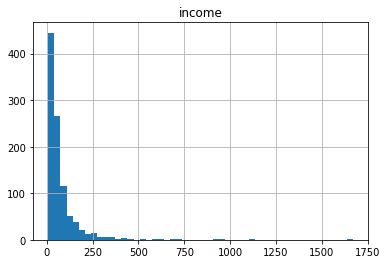

In [4]:
df.hist(column='income',bins=50)

### Feature Set

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Untuk menggunakan library scikit-learn kita harus mengkonversi data ke dalam bentuk numpy array

In [6]:
X = df[['region', 'tenure','age','marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

Apa yang akan menjadi label kelasnya?

In [7]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Normalisasi Data

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print("Train set :", X_train.shape, y_train.shape)
print ("Test set :", X_test.shape, y_test.shape)

Train set : (800, 11) (800,)
Test set : (200, 11) (200,)


### Classification

Import library K-Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#Untuk k=4
k=4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

In [12]:
#Predict
yhat = neigh.predict(X_test)
yhat

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3], dtype=int64)

In [13]:
#Evaluation Metrics
from sklearn import metrics
print('Train set accuracy :', metrics.accuracy_score(y_train,neigh.predict(X_train)))
print('Test set accuracy :', metrics.accuracy_score(y_test, yhat))

Train set accuracy : 0.5475
Test set accuracy : 0.32


In [14]:
#Untuk nilai k=6
k6 = 6
neigh6 = KNeighborsClassifier(n_neighbors = k6).fit(X_train,y_train)
neigh6

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [15]:
#Predict
yhat6 = neigh6.predict(X_test)
yhat6[0:5]

array([3, 3, 3, 4, 4], dtype=int64)

In [16]:
#Evaluation Metrics
from sklearn import metrics
print ('Train set accuracy:',metrics.accuracy_score(y_train,neigh6.predict(X_train)))
print ('Test set accuracy :', metrics.accuracy_score(y_test,yhat6))

Train set accuracy: 0.51625
Test set accuracy : 0.31


### Untuk nilai k yang lain

In [17]:
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];

#Train and Predict the model
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print('Mean Accuracy :', mean_acc)
print('Standard Deviation Accuracy:', std_acc)

Mean Accuracy : [0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
Standard Deviation Accuracy: [0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627]


### Plot Dataset

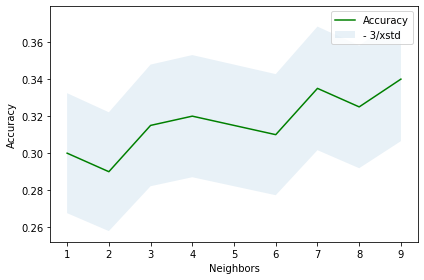

In [18]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy','- 3/xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.tight_layout()
plt.show()